# augmented model

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


# load data

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [4]:
data = {
    "train_images": train_images,
    "test_images": test_images,
    "train_labes": train_labels,
    "test_labels": test_labels
}

# preprocess data

In [5]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [6]:
train_images_norm.min(), train_images_norm.max() 

(0.0, 1.0)

In [7]:
test_images_norm.min(), test_images_norm.max() 

(0.0, 1.0)

# augment data

In [11]:
train_images_norm_4dim = np.expand_dims(train_images_norm, 3)

In [28]:
data_augmentation_layers = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(
        factor=0.1,
        fill_mode="constant",
        fill_value=0
    ),
    tf.keras.layers.experimental.preprocessing.RandomTranslation(
        height_factor=0.1,
        width_factor=0.1,
        fill_mode="constant",
        fill_value=0
    ),
    tf.keras.layers.experimental.preprocessing.RandomZoom(
        height_factor=0.2,
        width_factor=0.2,
        fill_mode="constant",
        fill_value=0
    )
])

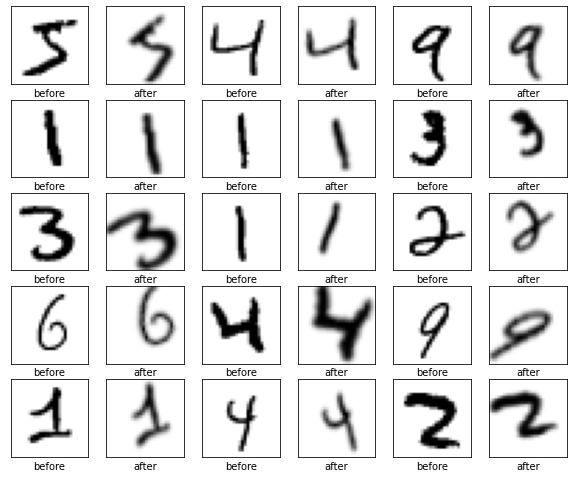

In [29]:
augmented_images = data_augmentation_layers(train_images_norm_4dim)
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    if(i%2 == 0):
        plt.imshow(train_images_norm_4dim[i], cmap=plt.cm.binary)
        plt.xlabel("before")
    else:
        plt.imshow(augmented_images[i-1], cmap=plt.cm.binary)
        plt.xlabel("after")

# build the model

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10)
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# complie the model

In [21]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
#     metrics=["accuracy"]
)

# fit

In [22]:
model.fit(
    train_images_norm,
    train_labels,
    epochs=5
)

Epoch 1/5
1875/1875 [==============================] - 1s 621us/step - loss: 0.4250 - sparse_categorical_accuracy: 0.8811 0s - loss: 0.5078 - sparse_categorical_accura
Epoch 2/5
1875/1875 [==============================] - 1s 609us/step - loss: 0.1230 - sparse_categorical_accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 1s 593us/step - loss: 0.0815 - sparse_categorical_accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 1s 581us/step - loss: 0.0604 - sparse_categorical_accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 1s 585us/step - loss: 0.0468 - sparse_categorical_accuracy: 0.9855


# evaluate

In [23]:
model.evaluate(test_images_norm, test_labels, verbose=2)

313/313 - 0s - loss: 0.0803 - sparse_categorical_accuracy: 0.9749


[0.08027275651693344, 0.9749000072479248]

# predict

In [24]:
raw_predictions = model.predict(test_images_norm)

In [25]:
raw_predictions.shape

(10000, 10)

In [26]:
raw_predictions[0]

array([ -5.7928896 ,  -8.658641  ,  -4.8017325 ,   0.38713807,
       -10.991446  ,  -5.2316656 , -17.878925  ,  11.337016  ,
        -4.309288  ,  -2.9614584 ], dtype=float32)

In [27]:
raw_predictions[0].sum()

-48.90189

In [28]:
np.argmax(raw_predictions[0])

7

In [29]:
test_labels[0]

7

## prob model

In [30]:
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [31]:
predictions = prob_model.predict(test_images_norm)

In [32]:
predictions.shape

(10000, 10)

In [33]:
predictions[0]

array([3.6355356e-08, 2.0700863e-09, 9.7954107e-08, 1.7559834e-05,
       2.0084669e-10, 6.3724272e-08, 2.0496013e-13, 9.9998140e-01,
       1.6028334e-07, 6.1694072e-07], dtype=float32)

In [34]:
predictions[0].sum()

0.99999994

In [35]:
np.argmax(predictions[0])

7

In [36]:
np.argsort(-predictions[0])

array([7, 3, 9, 8, 2, 5, 0, 1, 4, 6])

In [37]:
np.argsort(-raw_predictions[0])

array([7, 3, 9, 8, 2, 5, 0, 1, 4, 6])

# verify model

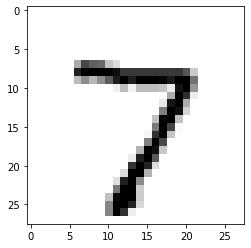

In [38]:
plt.imshow(test_images_norm[0], cmap=plt.cm.binary)
plt.show()

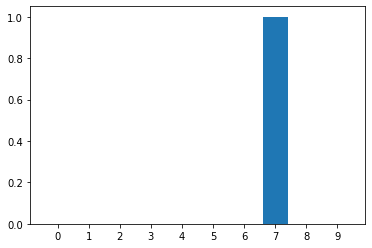

In [39]:
plt.bar(range(10), predictions[0])
plt.xticks(range(10))
plt.show()

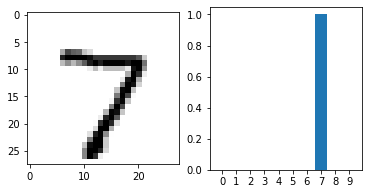

In [40]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.imshow(test_images_norm[0], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.bar(range(10), predictions[0])
plt.xticks(range(10))

plt.show()

In [41]:
def verify_prediction(i):
    plt.figure(figsize=(6,3))

    plt.subplot(1,2,1)
    plt.imshow(test_images_norm[i], cmap=plt.cm.binary)

    plt.subplot(1,2,2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))

    plt.show()

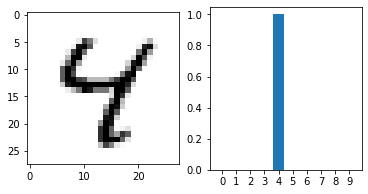

In [42]:
verify_prediction(6)

# use the trained model

In [43]:
img = test_images_norm[0]

In [44]:
# prob_model.predict(img)

In [45]:
img.shape

(28, 28)

In [46]:
img_3axis = np.expand_dims(img, 0)

In [47]:
img_3axis.shape

(1, 28, 28)

In [48]:
prob_model.predict(img_3axis)

array([[3.6355356e-08, 2.0700823e-09, 9.7954107e-08, 1.7559818e-05,
        2.0084630e-10, 6.3724393e-08, 2.0496169e-13, 9.9998140e-01,
        1.6028349e-07, 6.1694129e-07]], dtype=float32)

In [49]:
predictions_single = prob_model.predict(img_3axis)

In [50]:
np.argmax(predictions_single)

7

# save and load the model

In [51]:
prob_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["sparse_categorical_accuracy"]
#     metrics=["accuracy"]
)

prob_model.save("../saved_models/augmented_model.h5")

In [52]:
loaded_model = tf.keras.models.load_model("../saved_models/augmented_model.h5")

In [53]:
loaded_model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 0s 485us/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9749


[0.08027275651693344, 0.9749000072479248]